In [1]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd

compare each backends


25-08-19 17:12:03 - ⚠️ Function detectFace is deprecated. Use extract_faces instead.
25-08-19 17:12:05 - ⚠️ Function detectFace is deprecated. Use extract_faces instead.
25-08-19 17:12:05 - ⚠️ Function detectFace is deprecated. Use extract_faces instead.
25-08-19 17:12:06 - ⚠️ Function detectFace is deprecated. Use extract_faces instead.
25-08-19 17:12:08 - ⚠️ Function detectFace is deprecated. Use extract_faces instead.
25-08-19 17:12:15 - ⚠️ Function detectFace is deprecated. Use extract_faces instead.


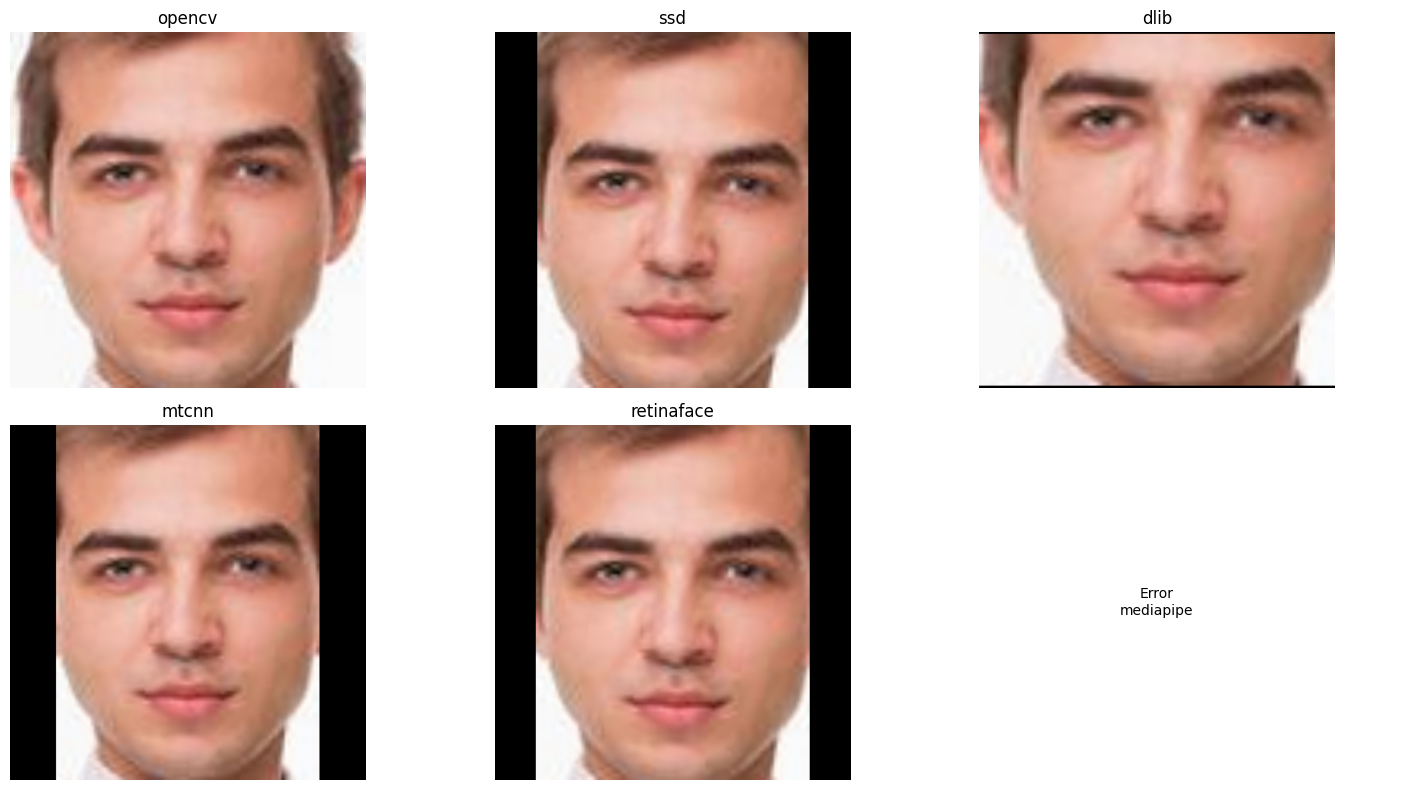

In [2]:
backends = ["opencv", "ssd", "dlib", "mtcnn", "retinaface", "mediapipe"]

img_path = "C:/Devang/projects/face recognition/image2.jpg"

plt.figure(figsize=(15, 8))

for i, backend in enumerate(backends):
    try:
        # Detect face
        face = DeepFace.detectFace(
            img_path=img_path,
            target_size=(750, 750),
            detector_backend=backend
        )

        # Remove batch dimension if present
        if face.ndim == 4:
            face = face[0]

        # Convert float [0,1] → uint8
        face = (face * 255).astype(np.uint8)

        # Show in subplot
        plt.subplot(2, 3, i + 1)
        plt.imshow(face)
        plt.title(backend)
        plt.axis('off')

    except Exception as e:
        plt.subplot(2, 3, i + 1)
        plt.text(0.5, 0.5, f"Error\n{backend}", ha='center', va='center', fontsize=10)
        plt.axis('off')

plt.tight_layout()
plt.show()

face verification


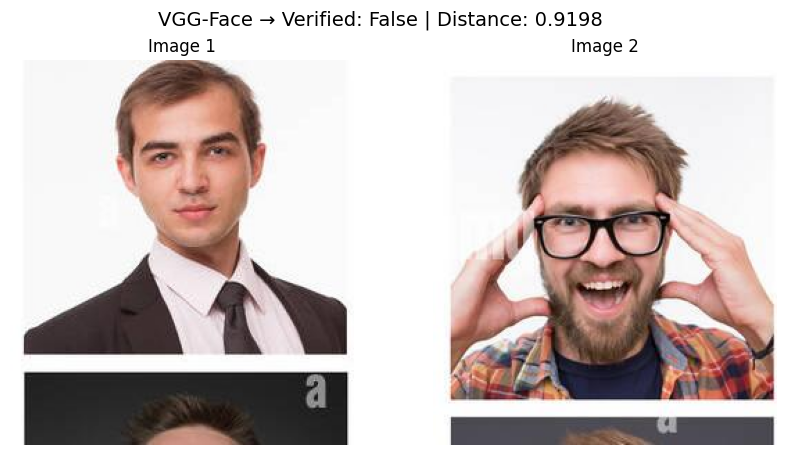

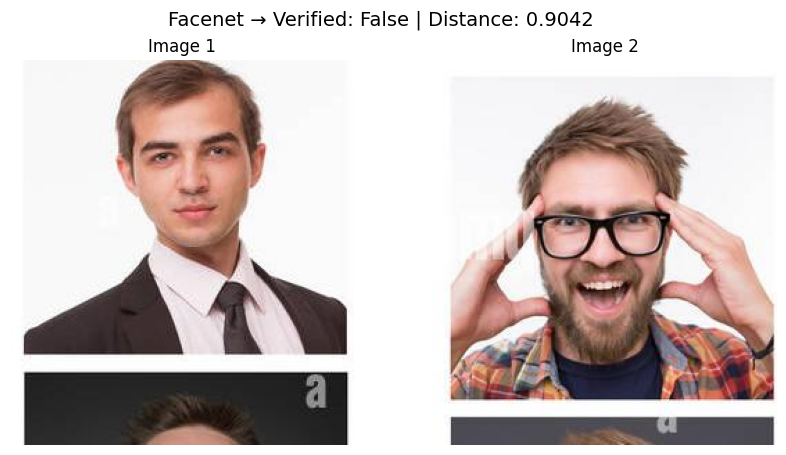

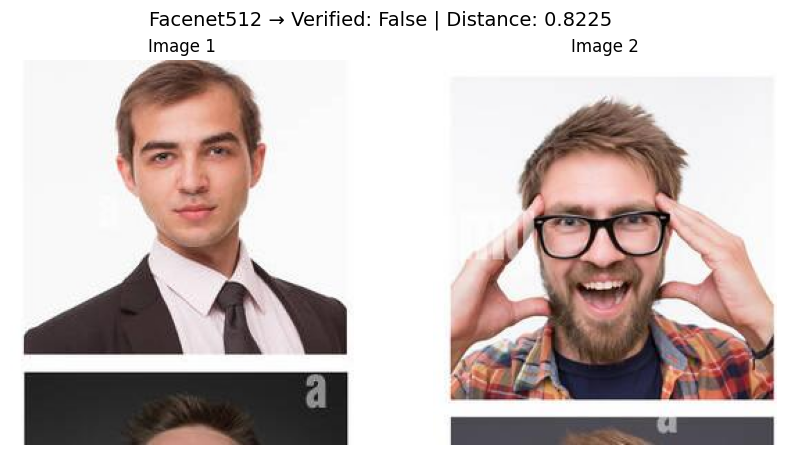

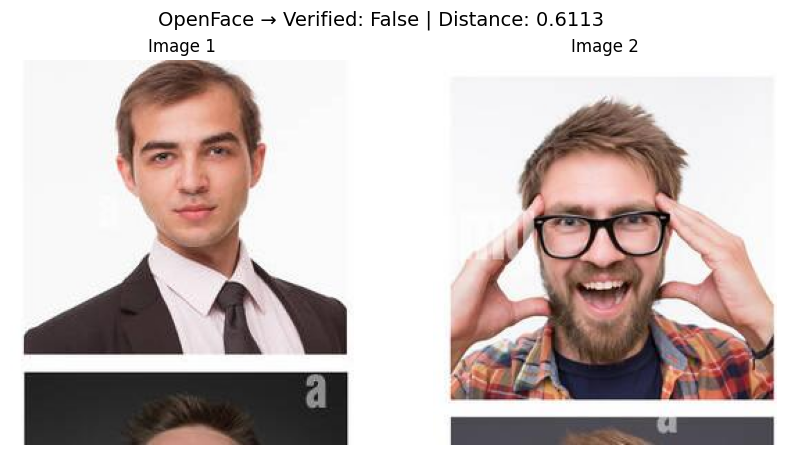

Model: DeepFace | Error: DeepFace model requires LocallyConnected2D but it is no longer supported after tf 2.12 but you have 2.19. You need to downgrade your tf.
Model: DeepId | Error: Invalid model_name passed - facial_recognition/DeepId
25-08-19 17:12:58 - 🔗 arcface_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5 to C:\Users\shashank\.deepface\weights\arcface_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5
To: C:\Users\shashank\.deepface\weights\arcface_weights.h5
100%|██████████| 137M/137M [00:40<00:00, 3.39MB/s] 


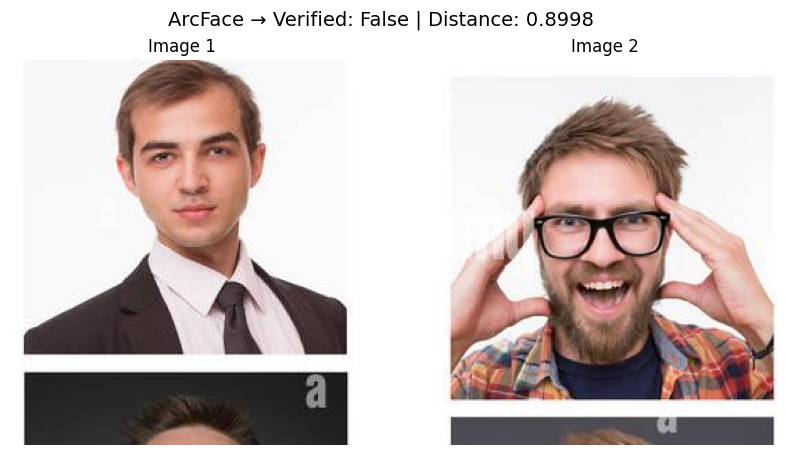

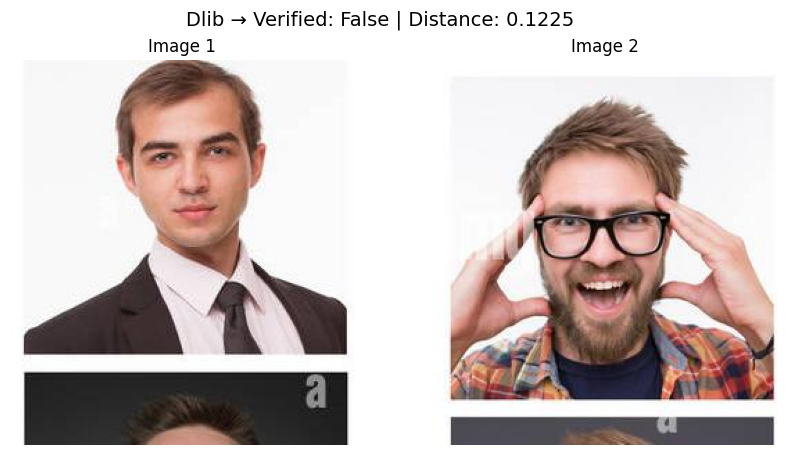

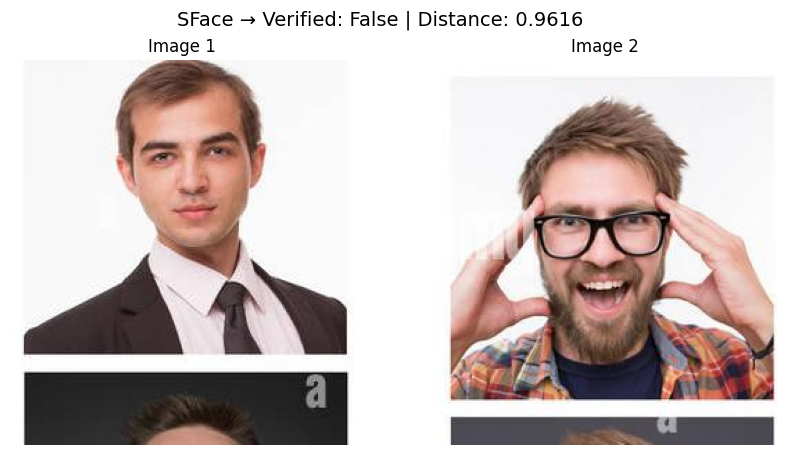

In [3]:


models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepId", "ArcFace", "Dlib", "SFace"]

img1 = "C:/Devang/projects/face recognition/image2.jpg"
img2 = "C:/Devang/projects/face recognition/image1.jpg"

for model in models:
    try:
        # Run verification
        result = DeepFace.verify(
            img1_path=img1,
            img2_path=img2,
            model_name=model,
            detector_backend="retinaface"
        )

        # Plot images
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(plt.imread(img1))
        axs[0].axis('off')
        axs[0].set_title("Image 1")

        axs[1].imshow(plt.imread(img2))
        axs[1].axis('off')
        axs[1].set_title("Image 2")

        # Title with verification result
        fig.suptitle(f"{model} → Verified: {result['verified']} | Distance: {result['distance']:.4f}", fontsize=14)
        plt.show()

    except Exception as e:
        print(f"Model: {model} | Error: {e}")




face recognition


In [4]:
from deepface import DeepFace

df = DeepFace.find(
    img_path="C:/Devang/projects/face recognition/image1.jpg",
    db_path="C:/Devang/projects/face recognition/emotion_faces",
    detector_backend="retinaface"  # you can try other backends
)

print(df)


25-08-19 17:13:58 - Searching C:/Devang/projects/face recognition/image1.jpg in 33 length datastore
25-08-19 17:13:58 - find function duration 4.106985569000244 seconds
[                                            identity  \
0  C:/Devang/projects/face recognition/emotion_fa...   
1  C:/Devang/projects/face recognition/emotion_fa...   
2  C:/Devang/projects/face recognition/emotion_fa...   
3  C:/Devang/projects/face recognition/emotion_fa...   

                                       hash  target_x  target_y  target_w  \
0  e927355ccf49825b23d3722d1ffc7a76e6906c53        75        65        91   
1  15d5723c7bdf5f544afdcb241645c5d4edf5d054        67        65       101   
2  f25d2360475c06ac8a5b4450cd264a0e6fedce97        62         0       107   
3  044ccd0b4f8742787505b2cd1dc317df2aeb7d4b        77         0        91   

   target_h  threshold  source_x  source_y  source_w  source_h  distance  \
0       144       0.68        75        65        91       144  0.036320   
1       139

facial analysis

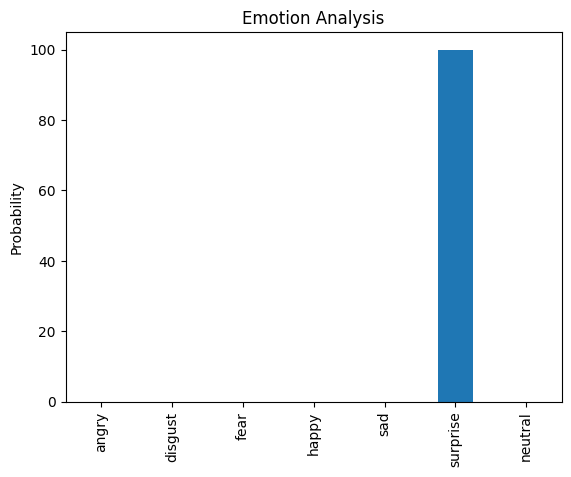

In [5]:
result = DeepFace.analyze(
    img_path="C:/Devang/projects/face recognition/image4.jpg",
    actions=["emotion"]
)[0]  # get first result

# Create DataFrame and plot
pd.DataFrame(result["emotion"], index=[0]).T.plot(kind="bar", legend=False)
plt.ylabel("Probability")
plt.title("Emotion Analysis")
plt.show()